In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('processed_onboarding_dataset (2).csv')
df2 = pd.read_csv('unique_employees_weighted_vibe.csv')

In [ ]:
df1.head()

,Employee_ID,Joining_Date,Onboarding_Feedback,Mentor_Assigned,Initial_Training_Completed
0,EMP0001,2024-03-26,3,1,0
1,EMP0003,2023-11-29,0,1,1
2,EMP0004,2023-08-09,1,1,1
3,EMP0006,2024-01-22,2,0,0
4,EMP0009,2023-08-31,1,1,0


In [ ]:
df2.head()

,Employee_ID,Weighted_vibe_Score
0,EMP0002,1.0000
1,EMP0003,2.9996
2,EMP0004,4.0000
3,EMP0005,3.0000
4,EMP0006,5.0000


In [ ]:
df1.shape

(320, 5)

In [ ]:

df2.shape

(315, 2)

In [ ]:
df1.isnull().sum()

,0
Employee_ID,0
Joining_Date,0
Onboarding_Feedback,0
Mentor_Assigned,0
Initial_Training_Completed,0


In [ ]:
df2.isnull().sum()

,0
Employee_ID,0
Weighted_vibe_Score,0


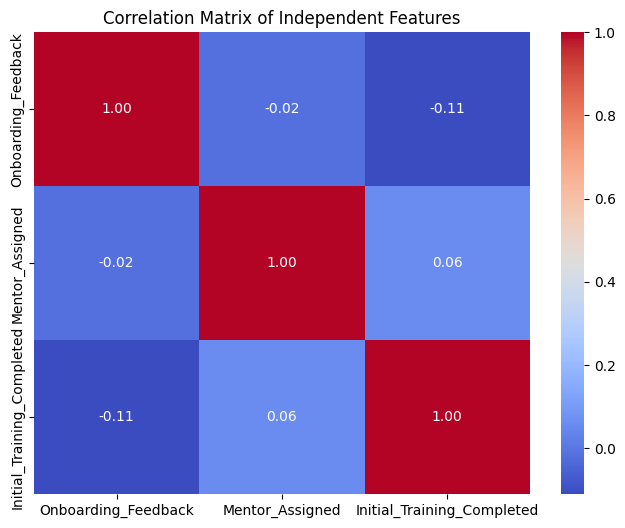

In [ ]:
independent_features = ['Onboarding_Feedback', 'Mentor_Assigned', 'Initial_Training_Completed']

correlation_matrix = df1[independent_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Features")
plt.show()

In [ ]:
df_merged = df1.merge(df2[['Employee_ID', 'Weighted_vibe_Score']], on='Employee_ID', how='inner')

df_merged.head()

,Employee_ID,Joining_Date,Onboarding_Feedback,Mentor_Assigned,Initial_Training_Completed,Weighted_vibe_Score
0,EMP0003,2023-11-29,0,1,1,2.9996
1,EMP0004,2023-08-09,1,1,1,4.0000
2,EMP0006,2024-01-22,2,0,0,5.0000
3,EMP0009,2023-08-31,1,1,0,4.0000
4,EMP0010,2023-11-14,2,0,1,4.0000


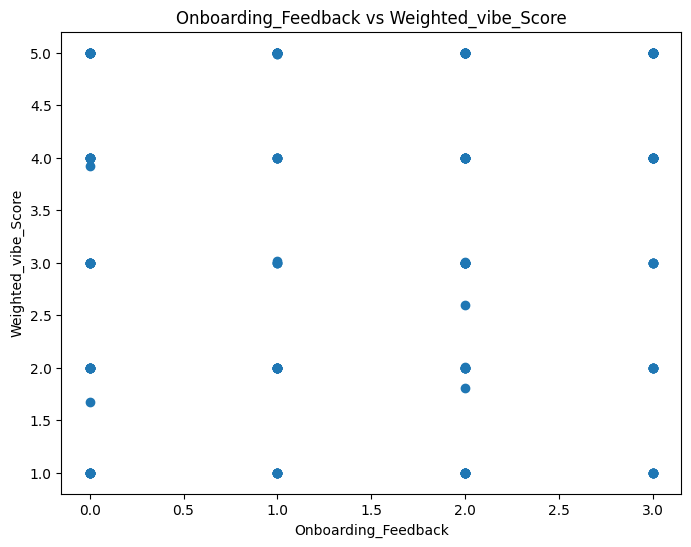

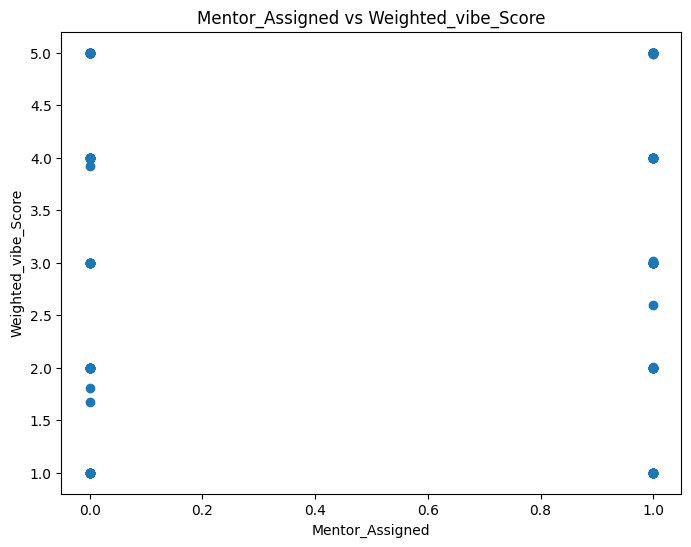

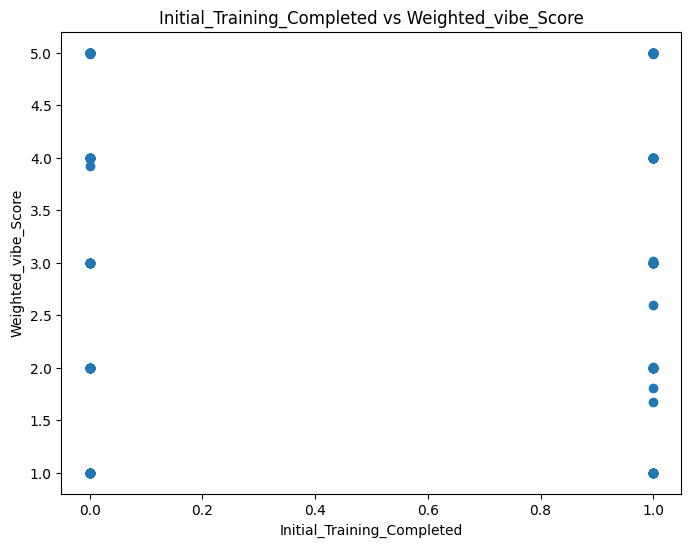

In [ ]:
independent_features = ['Onboarding_Feedback', 'Mentor_Assigned', 'Initial_Training_Completed']

for feature in independent_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_merged[feature], df_merged['Weighted_vibe_Score'])
    plt.xlabel(feature)
    plt.ylabel('Weighted_vibe_Score')
    plt.title(f'{feature} vs Weighted_vibe_Score')
    plt.show()


In [ ]:
correlation_with_emotion = df_merged[independent_features + ['Weighted_vibe_Score']].corr()['Weighted_vibe_Score'][:-1]

print("Correlation between independent features and Weighted_vibe_Score:")
correlation_with_emotion

Correlation between independent features and Weighted_vibe_Score:


,Weighted_vibe_Score
Onboarding_Feedback,0.096692
Mentor_Assigned,0.017917
Initial_Training_Completed,0.052866


In [ ]:
X = df_merged[independent_features].values
y = df_merged['Weighted_vibe_Score'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(df_merged.isnull().sum())


Employee_ID                   0
Joining_Date                  0
Onboarding_Feedback           0
Mentor_Assigned               0
Initial_Training_Completed    0
Weighted_vibe_Score           0
dtype: int64


In [ ]:
input_layer = Input(shape=(X_scaled.shape[1],))

encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded_feature = Dense(1, activation='linear', name='combined_feature')(encoded)

output_layer = Dense(1, activation='linear', name='vibe_score_prediction')(encoded_feature)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')

model.fit(X_scaled, y, epochs=500, batch_size=4, verbose=1, shuffle=True)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9843
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4396 
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6764  
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0871 
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9452
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8543
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1458
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4876 
Epoch 9/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6518 
Epoch 10/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1545 
Epoch 11/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6292 
Epoch 12/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2447
Epoch 13/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8884 
Epoch 14/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7731 
Epoch 15/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2

In [ ]:
print("Shape of X_scaled:", X_scaled.shape)
print("Expected input shape:", model.input_shape)


Shape of X_scaled: (200, 3)
Expected input shape: (None, 3)


In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded_feature)
df_merged['combined_feature_performance'] = encoder.predict(X_scaled)

df_merged[['Employee_ID', 'combined_feature_performance', 'Weighted_vibe_Score']]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Employee_ID,combined_feature_performance,Weighted_vibe_Score
0,EMP0003,4.376141,2.9996
1,EMP0004,4.565117,4.0000
2,EMP0006,4.372383,5.0000
3,EMP0009,4.262467,4.0000
4,EMP0010,4.381753,4.0000
...,...,...,...
195,EMP0488,3.470651,1.0000
196,EMP0489,4.372383,5.0000
197,EMP0490,4.262467,1.0000
198,EMP0491,4.262467,5.0000


In [ ]:
df_merged[['combined_feature_performance', 'Weighted_vibe_Score']].corr()

,combined_feature_performance,Weighted_vibe_Score
combined_feature_performance,1.000000,0.159639
Weighted_vibe_Score,0.159639,1.000000


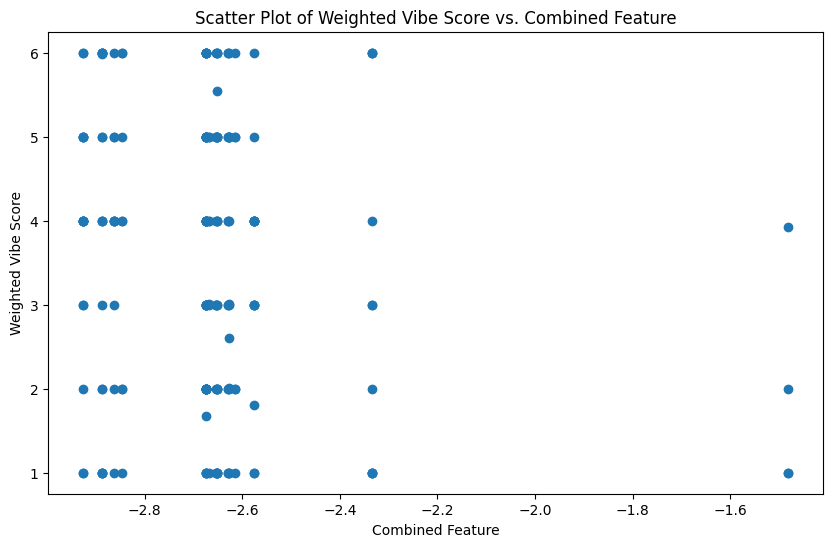

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['combined_feature_performance'], df_merged['Weighted_vibe_Score'])
plt.xlabel('Combined Feature')
plt.ylabel('Weighted Vibe Score')
plt.title('Scatter Plot of Weighted Vibe Score vs. Combined Feature')
plt.show()

In [ ]:
quantile_20 = df_merged['combined_feature_performance'].quantile(0.2)
quantile_80 = df_merged['combined_feature_performance'].quantile(0.8)
range_80_20 = quantile_80 - quantile_20

df_merged['should_chat_performance'] = np.where(
    df_merged['combined_feature_performance'] < quantile_20,
    ((quantile_20 - df_merged['combined_feature_performance']) / range_80_20) * 100,
    np.where(
        df_merged['combined_feature_performance'] > quantile_80,
        ((df_merged['combined_feature_performance'] - quantile_80) / range_80_20) * 100,
        0
    )
)

In [ ]:
df_merged.head()

,Employee_ID,Joining_Date,Onboarding_Feedback,Mentor_Assigned,Initial_Training_Completed,Weighted_vibe_Score,combined_feature_performance,should_chat_performance
0,EMP0003,2023-11-29,0,1,1,2.9996,-2.674223,0.000000
1,EMP0004,2023-08-09,1,1,1,4.0000,-2.668371,0.000000
2,EMP0006,2024-01-22,2,0,0,5.0000,-2.652601,0.000000
3,EMP0009,2023-08-31,1,1,0,4.0000,-2.887265,10.753055
4,EMP0010,2023-11-14,2,0,1,4.0000,-2.575297,21.611820


In [ ]:
df_merged.to_csv('combined_feature_onboarding.csv', index = False)